# 📚 SeaBorn Library

# 🔤 Types
* [Bar Plot](#1)
* [Point Plot](#6)
* [Joint Plot](#7)
* [Pie Chart](#8)
* [Lm Plot](#9)
* [Kde Plot](#10)
* [Violin Plot](#11)
* [Heatmap](#12)
* [Box Plot](#13)
* [Swarm Plot](#14)
* [Pair Plot](#15)
* [Count Plot](#16)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings
warnings.filterwarnings('ignore') 

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

seaborn-tutorial-datasets



# 💾 Data
* MedianHouseholdIncome2015
* PercentagePeopleBelowPovertyLevel: Proportion of people below the poverty line
* PercentOver25CompletedHighSchool: The rate of high school graduates among people over 25 years of age
* PoliceKillingsUS: People killed by police
* ShareRaceByCity : City populations by race

In [2]:
# Read datas

median_house_hold_in_come = pd.read_csv(r"/kaggle/input/seaborn-tutorial-datasets/MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv(r"/kaggle/input/seaborn-tutorial-datasets/PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv(r"/kaggle/input/seaborn-tutorial-datasets/PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv(r"/kaggle/input/seaborn-tutorial-datasets/ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv(r"/kaggle/input/seaborn-tutorial-datasets/PoliceKillingsUS.csv", encoding="windows-1252")

<a id = "1"></a>
## Bar Plot
* [Bar Plot 1](#2)
* [Bar Plot 2](#3)
* [Bar Plot 3](#4)
* [Bar Plot 4](#5)

<a id = "2"></a>
### Bar Plot 1

In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [5]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

poverty_rate
0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: count, Length: 771, dtype: int64

In [6]:
area_list = (percentage_people_below_poverty_level["Geographic Area"].unique())
area_list

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [7]:
len(percentage_people_below_poverty_level["Geographic Area"].unique())

51

In [8]:
percentage_people_below_poverty_level.poverty_rate.replace(["-"],0.0,inplace=True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

Text(0.5, 1.0, 'Poverty Rate Given States')

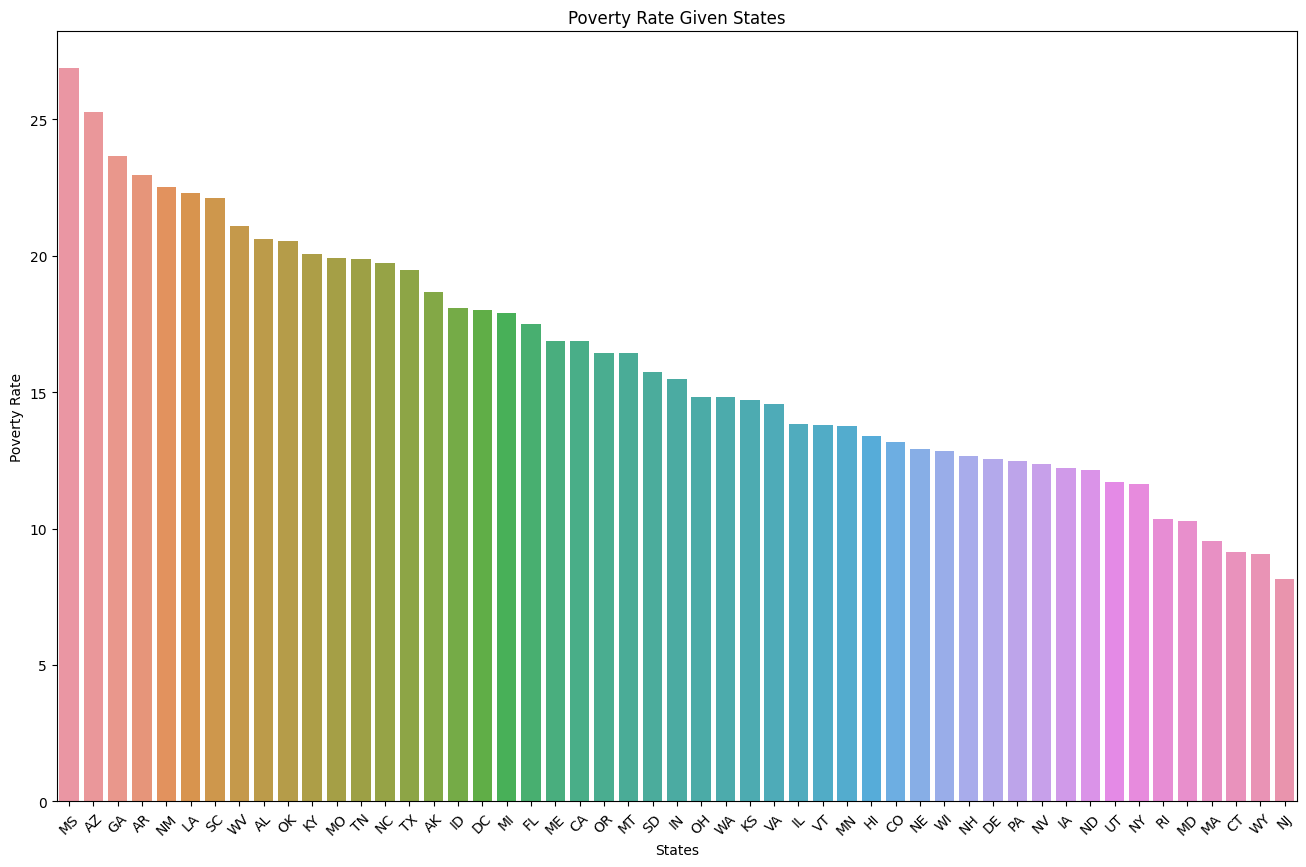

In [9]:
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level["Geographic Area"] == i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(16,10))
sns.barplot(x=sorted_data["area_list"], y=sorted_data["area_poverty_ratio"])
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')


<a id = "3"></a>
### Bar Plot 2

In [10]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [11]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [12]:
kill["name"].value_counts()

name
TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: count, Length: 2481, dtype: int64

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

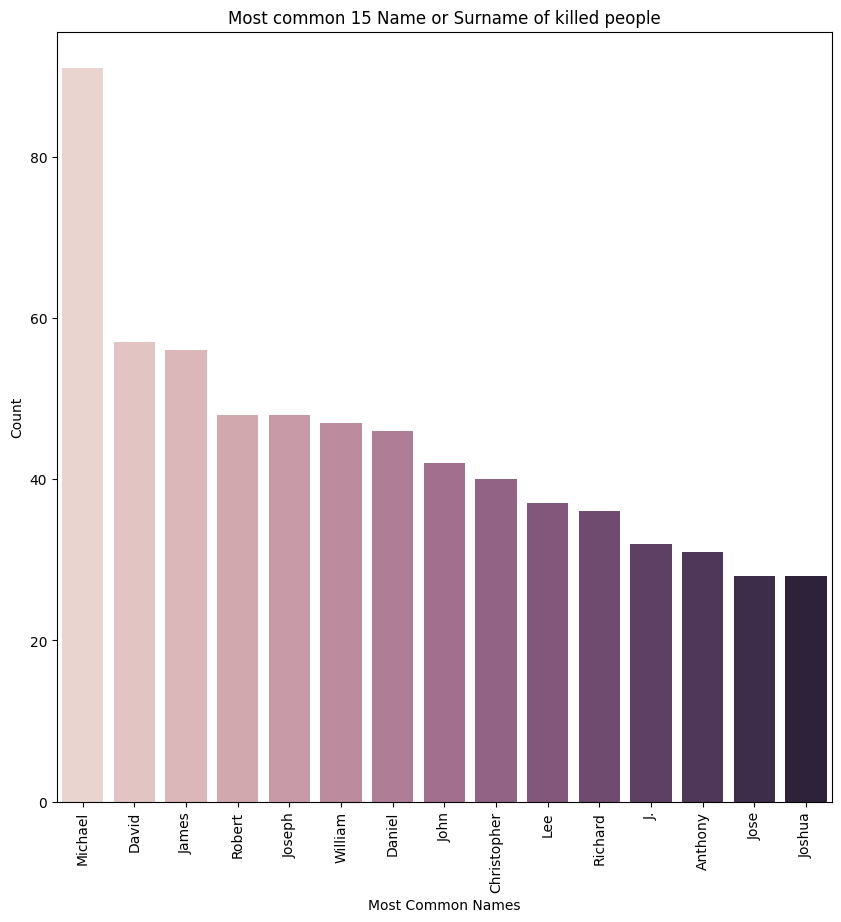

In [13]:
seperate = kill.name[kill.name !="TK TK"].str.split()
a,b=zip(*seperate)
name_list = a + b # hem isim ya da soy isim
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x) , list(y)

plt.figure(figsize=(10,10))
sns.barplot(x = x, y = y, palette = sns.cubehelix_palette(len(x)))
plt.xticks(rotation = 90)
plt.xlabel("Most Common Names")
plt.ylabel("Count")
plt.title('Most common 15 Name or Surname of killed people')

In [14]:
name_count.most_common(15)

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

<a id = "4"></a>
### Bar Plot 3

In [15]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [16]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [17]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

percent_completed_hs
100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: count, Length: 728, dtype: int64

Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

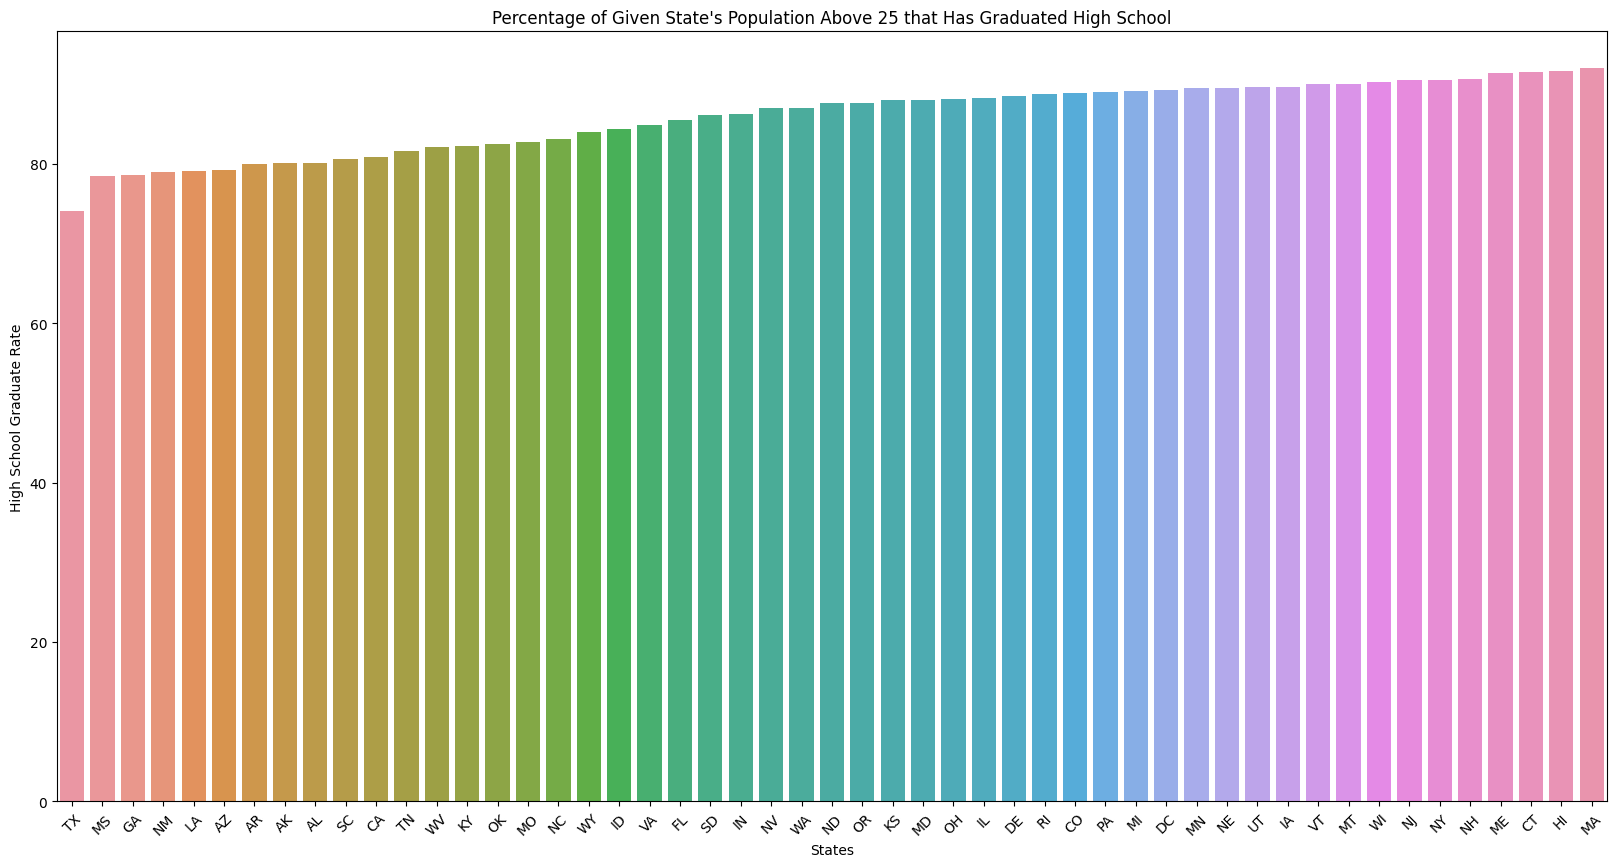

In [18]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(["-"],0.0,inplace=True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

area_list = (percent_over_25_completed_highSchool["Geographic Area"].unique())
area_highschool = []

for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

data = pd.DataFrame({"area_list": area_list,"area_highschool_ratio": area_highschool})
new_index = (data["area_highschool_ratio"].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

plt.figure(figsize=(20,10))
sns.barplot(x=sorted_data2["area_list"],y=sorted_data2["area_highschool_ratio"])
plt.xticks(rotation= 45)
plt.xlabel("States")
plt.ylabel("High School Graduate Rate")
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

In [19]:
x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
x

,Geographic Area,City,percent_completed_hs
29125,WY,Afton town,95.2
29126,WY,Albany CDP,85.4
29127,WY,Albin town,79.1
29128,WY,Alcova CDP,0.0
29129,WY,Alpine town,93.1
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100.0
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


<a id = "5"></a>
### Bar Plot 4

In [20]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [21]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [22]:
# share_race_city.City
# share_race_city.share_white
# share_race_city.share_white.value_counts()
# share_race_city.share_hispanic.value_counts()
# .
# .
# .
# share_race_city["Geographic area"].unique()
# share_race_city["City"].unique()
len(share_race_city["City"].unique())

24219

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

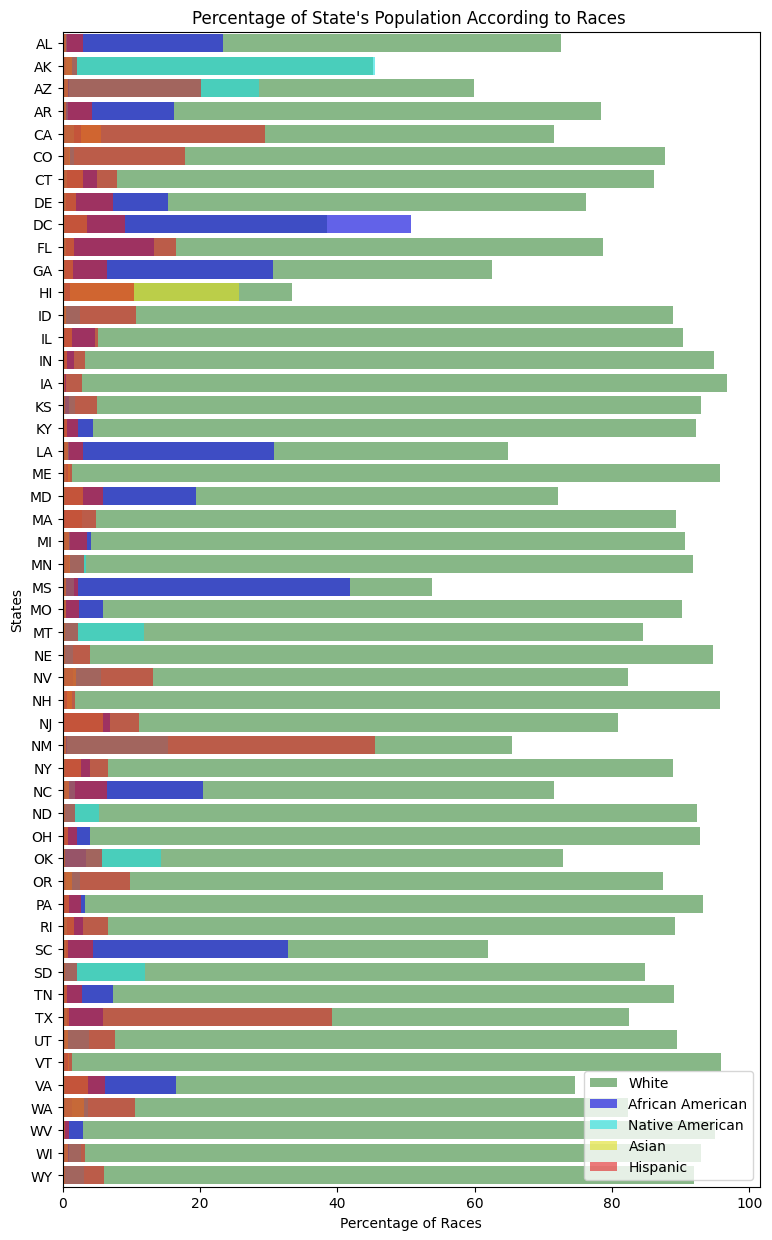

In [23]:
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)

share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city["Geographic area"].unique())

share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

for i in area_list:
    x = share_race_city[share_race_city["Geographic area"] == i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))


f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white , y=area_list,color="green",alpha = 0.5,label='White')
sns.barplot(x=share_black , y=area_list,color="blue",alpha = 0.7,label='African American')
sns.barplot(x=share_native_american , y=area_list,color="cyan",alpha = 0.6,label='Native American')
sns.barplot(x=share_asian , y=area_list,color="yellow",alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic , y=area_list,color="red",alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

<a id = "6"></a>
## Point Plot

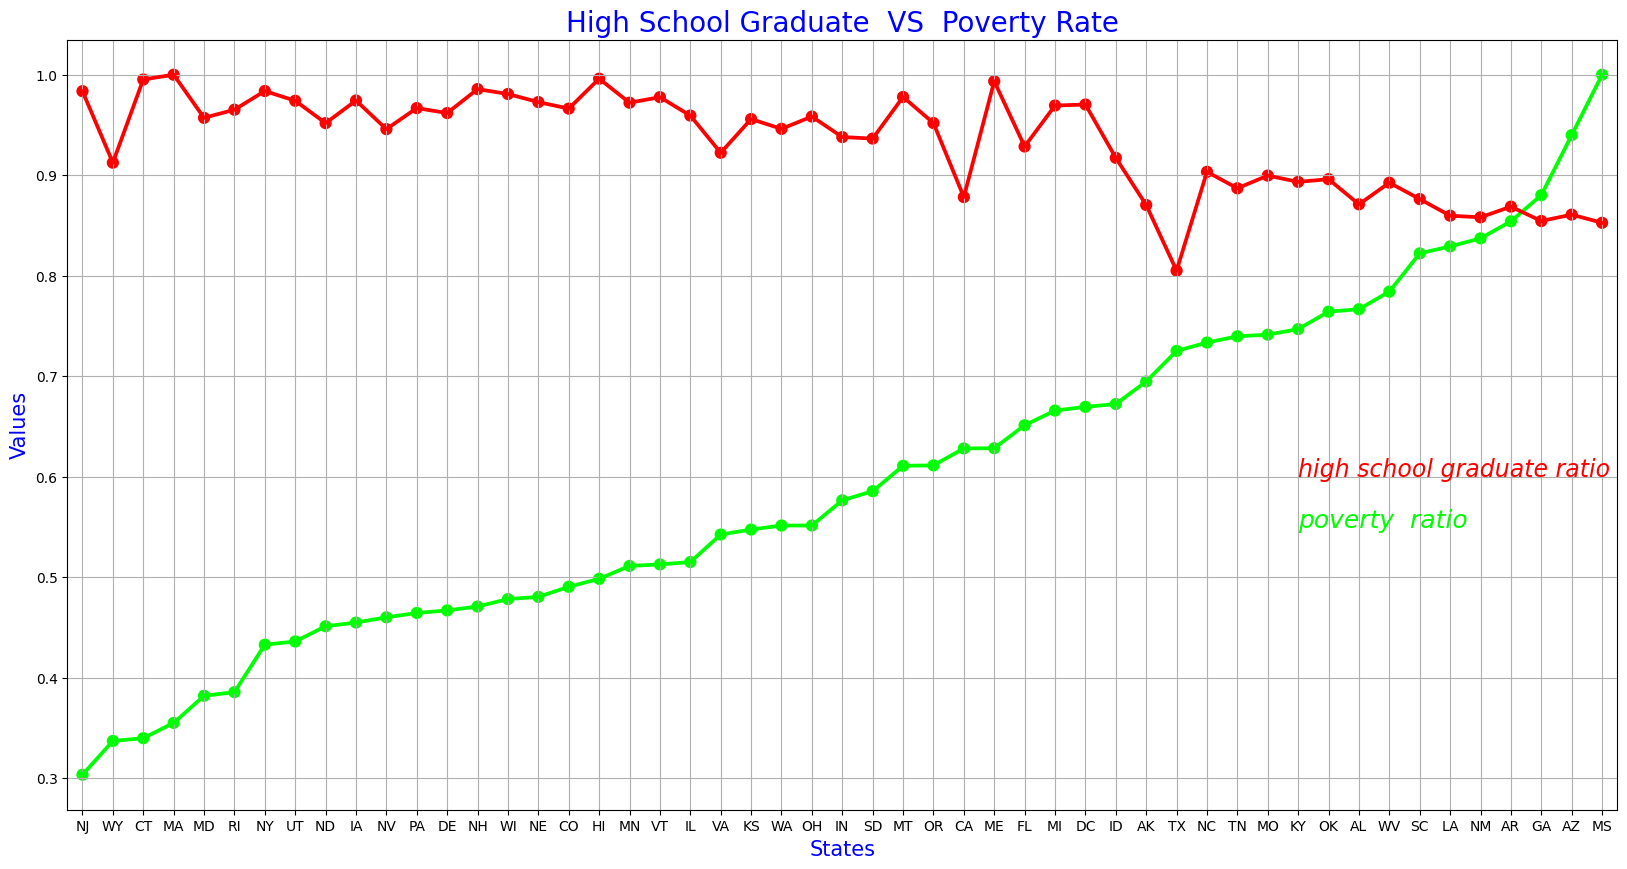

In [24]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio'] / sorted_data['area_poverty_ratio'].max()
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio'] / sorted_data2['area_highschool_ratio'].max()

data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x="area_list",y="area_poverty_ratio",data=data,color = "lime")
sns.pointplot(x="area_list", y="area_highschool_ratio",data=data, color = "red")
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55, "poverty  ratio", color = "lime",fontsize = 18 , style = "italic")
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

<a id = "7"></a>
## Joint Plot

In [25]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


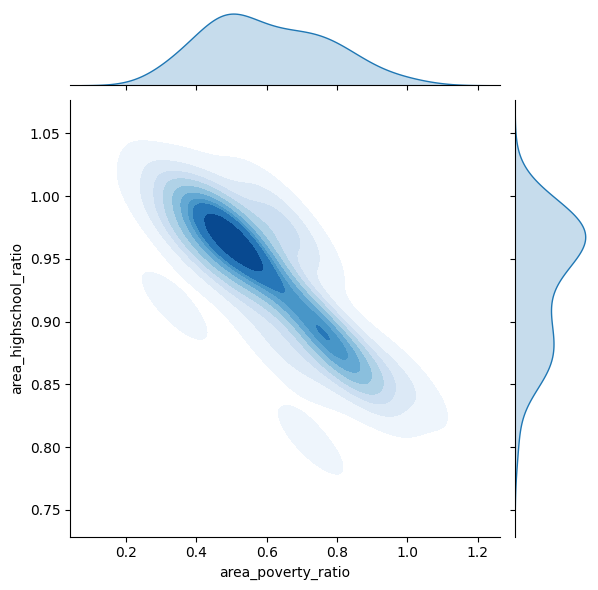

In [26]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 

g = sns.jointplot(data=data, x='area_poverty_ratio', y='area_highschool_ratio', 
                  kind="kde", height=6, fill=True, cmap="Blues")

In [27]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


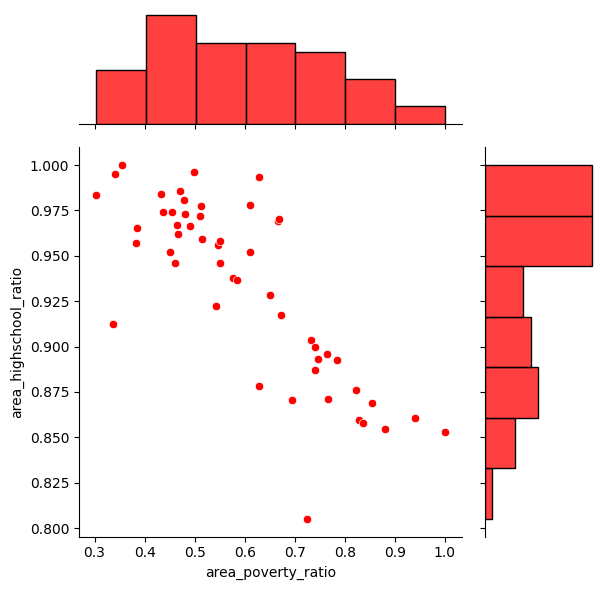

In [28]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one

g = sns.jointplot(data=data ,x='area_poverty_ratio', y='area_highschool_ratio',
                 height=6,ratio = 3, color="#FF0000")

<a id = "8"></a>
## Pie Chart

In [29]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [30]:
kill.race.value_counts()

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

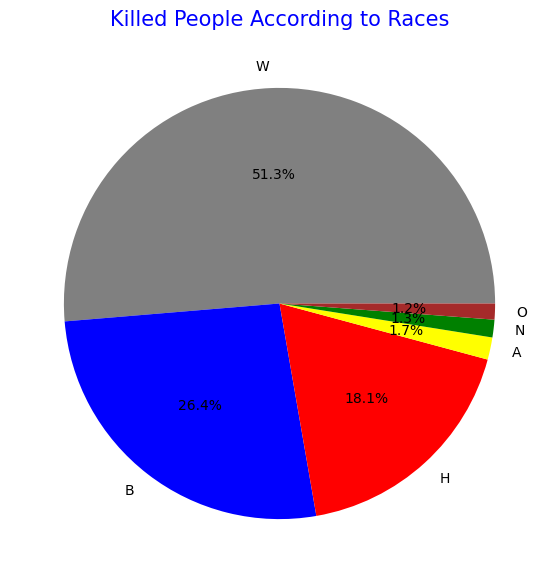

In [31]:
# Race rates according in kill data

kill.race.dropna(inplace=True)
labels = kill.race.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes ,explode = explode, labels=labels, colors = colors
       , autopct='%1.1f%%')
plt.title("Killed People According to Races", color = 'blue' ,fontsize = 15)

<a id = "9"></a>
## Lm Plot

In [32]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


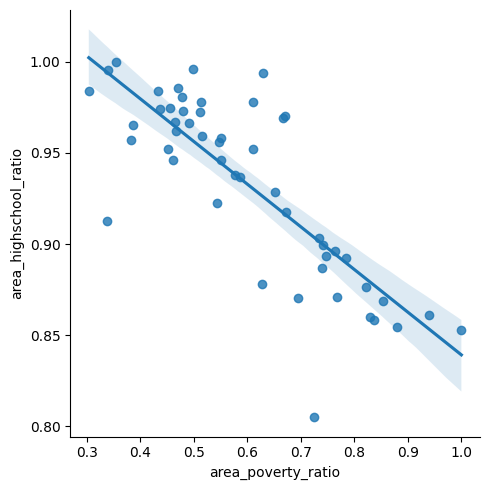

In [33]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset

sns.lmplot(data=data, x="area_poverty_ratio", y="area_highschool_ratio")

<a id = "10"></a>
## Kde Plot

In [34]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


<Axes: xlabel='area_poverty_ratio', ylabel='area_highschool_ratio'>

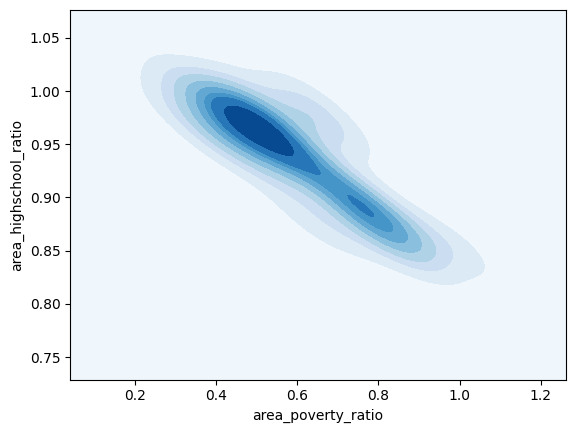

In [35]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot

sns.kdeplot(data=data,x="area_poverty_ratio" , y="area_highschool_ratio", fill=True, cut=3, thresh=0, cmap='Blues')

<a id = "11"></a>
## Violin Plot

In [36]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


<Axes: >

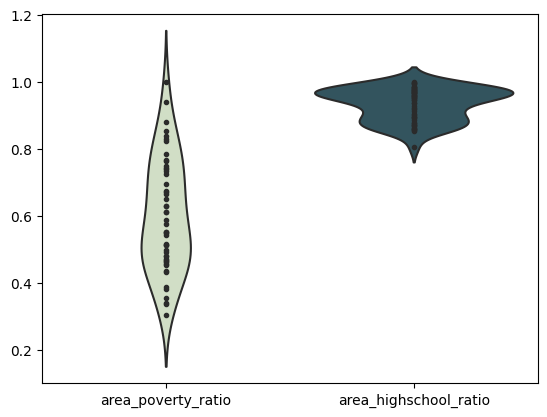

In [37]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palettz

pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")

<a id = "12"></a>
## Heatmap

In [38]:
correlationnn1 = data.corr(numeric_only=True)
print(correlationnn1)

                       area_poverty_ratio  area_highschool_ratio
area_poverty_ratio               1.000000              -0.805761
area_highschool_ratio           -0.805761               1.000000


<Axes: >

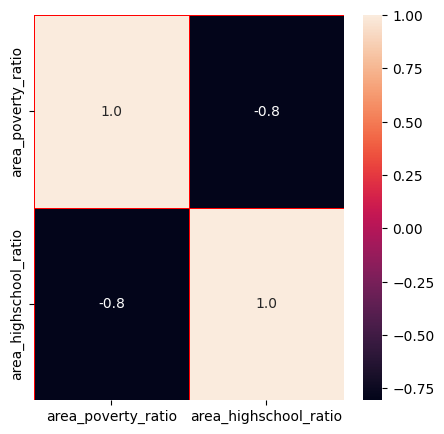

In [39]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code

f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.select_dtypes(include=['number']).corr(), 
            annot=True, 
            linewidths=0.5,
            linecolor="red", 
            fmt='.1f',
            ax=ax)

<a id = "13"></a>
## Box Plot

In [40]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [41]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

<Axes: xlabel='gender', ylabel='age'>

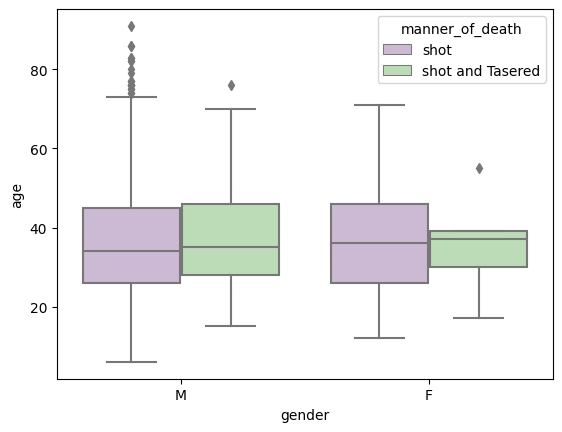

In [42]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes

sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")

<a id = "14"></a>
## Swarm Plot

In [43]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


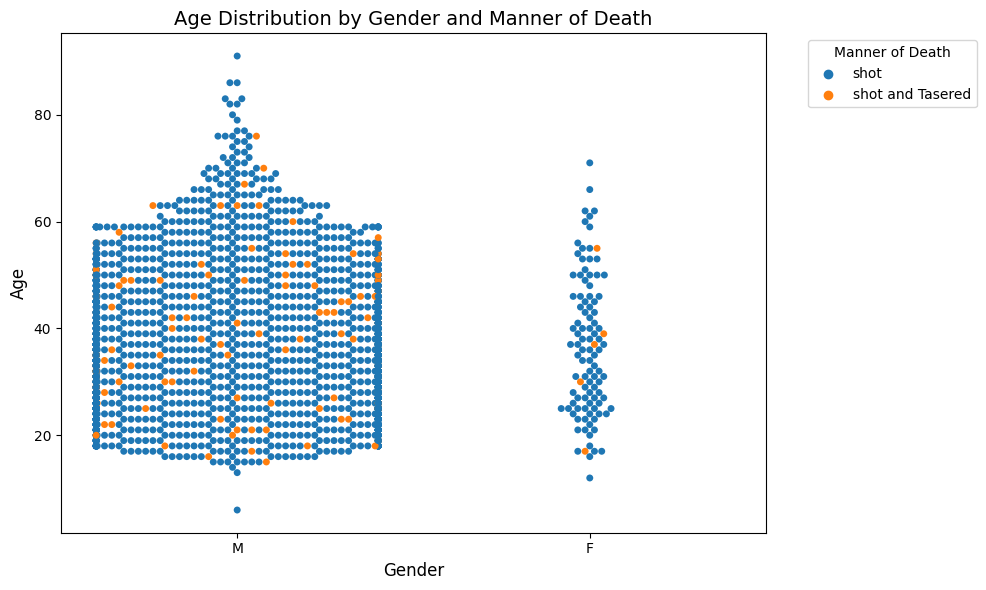

In [44]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas

plt.figure(figsize=(10, 6))
sns.swarmplot(data=kill, x="gender", y="age", hue="manner_of_death")
plt.title("Age Distribution by Gender and Manner of Death", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Manner of Death", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<a id = "15"></a>
## Pair Plot

In [45]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


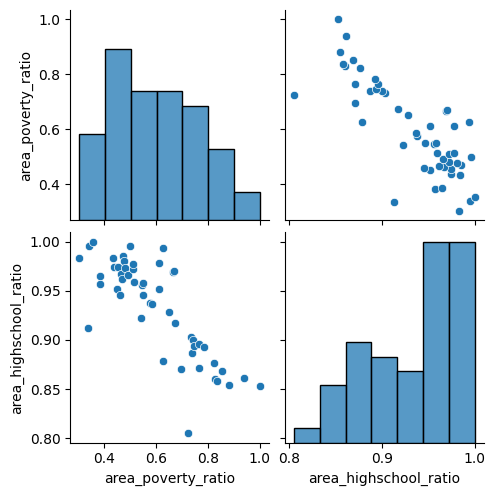

In [46]:
# pair plot

sns.pairplot(data)

<a id = "16"></a>
## Count Plot

In [47]:
kill.gender.value_counts()

gender
M    2428
F     107
Name: count, dtype: int64

In [48]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5, 1.0, 'Manner of Death')

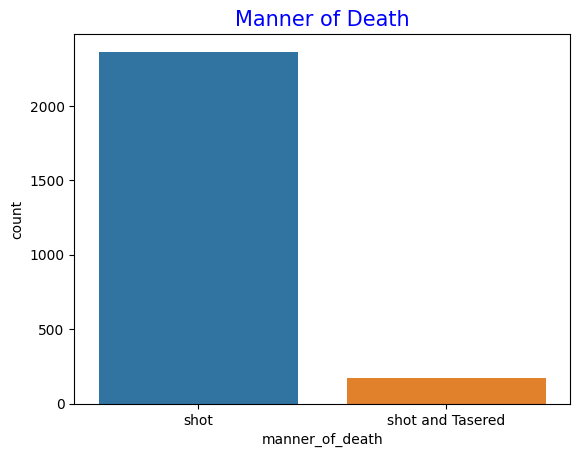

In [49]:
# kill properties
# Manner of death

#sns.countplot(x=kill['gender'])

sns.countplot(x= kill["manner_of_death"])

plt.title("Manner of Death",color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Kill weapon')

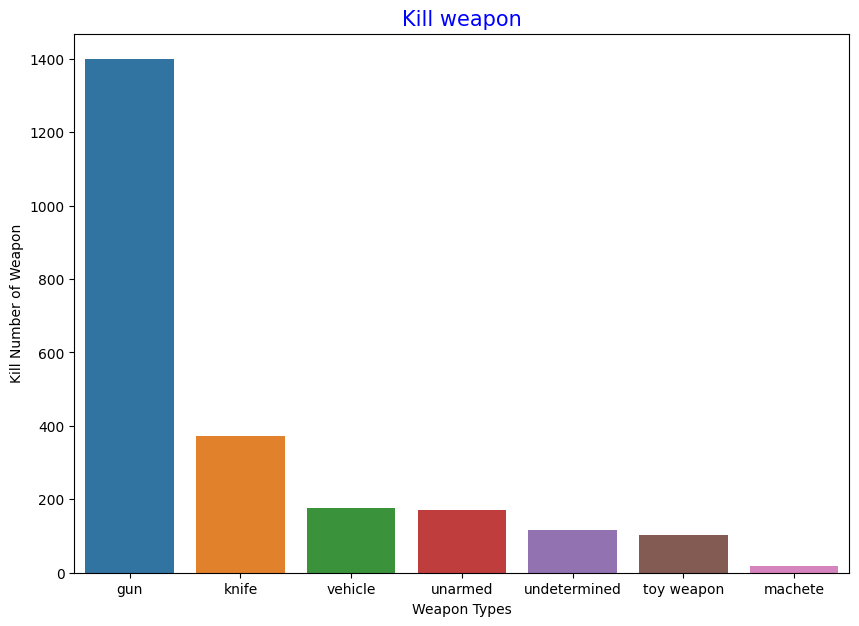

In [50]:
# kill weapon

armed = kill.armed.value_counts()
#print(armed)

plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Kill Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

In [51]:
armed

armed
gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: count, Length: 68, dtype: int64

Text(0.5, 1.0, 'Age of killed people')

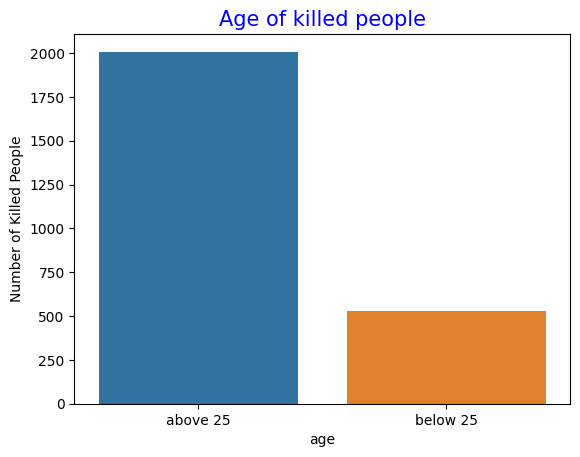

In [52]:
# age of killed people

age_list =['above 25' if i >= 25 else 'below 25' for i in kill.age]
df = pd.DataFrame({'age':age_list})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Race of killed people')

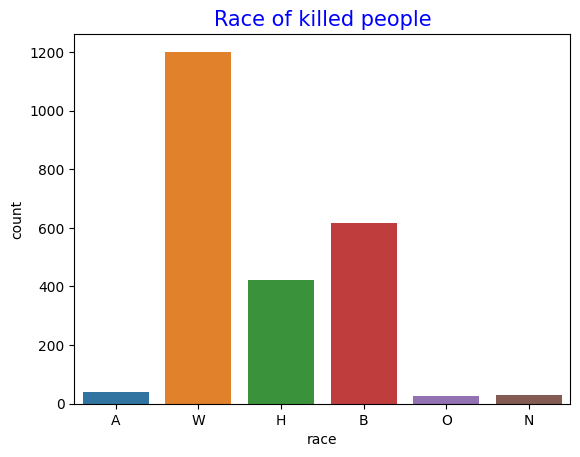

In [53]:
# Race of killed people

sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Most dangerous cities')

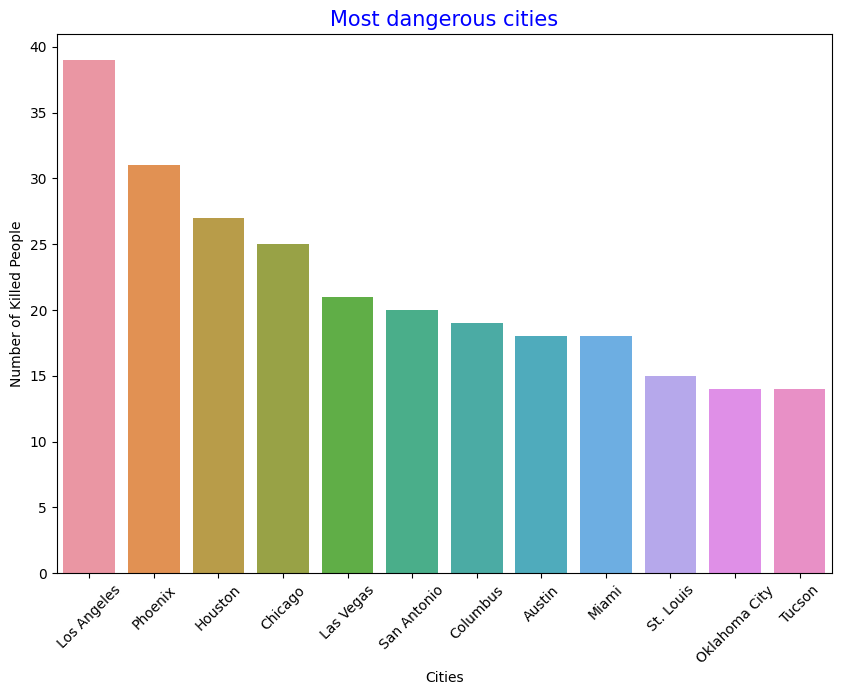

In [54]:
# Most dangerous cities

city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.ylabel('Number of Killed People')
plt.xlabel('Cities')
plt.title('Most dangerous cities',color = 'blue',fontsize=15)

In [55]:
city

city
Los Angeles         39
Phoenix             31
Houston             27
Chicago             25
Las Vegas           21
                    ..
Columbia Heights     1
Ozark                1
Lampe                1
Seagoville           1
Oshkosh              1
Name: count, Length: 1417, dtype: int64

Text(0.5, 1.0, 'Most dangerous state')

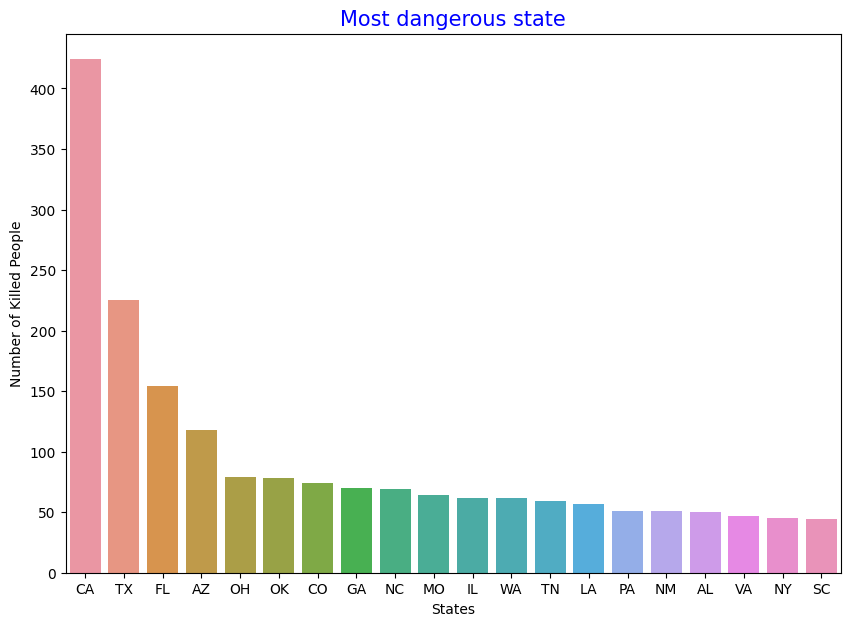

In [56]:
# most dangerous states

state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.ylabel('Number of Killed People')
plt.xlabel('States')
plt.title('Most dangerous state',color = 'blue',fontsize=15)

In [57]:
state.head(10)

state
CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
Name: count, dtype: int64

Text(0.5, 1.0, 'Having mental illness or not')

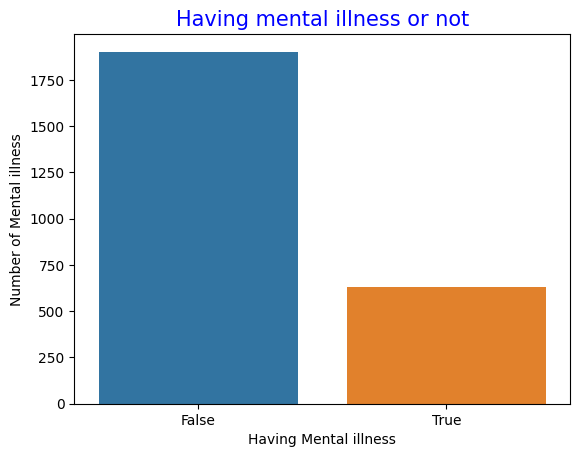

In [58]:
# Having mental ilness or not for killed people

sns.countplot(x=kill["signs_of_mental_illness"])
plt.xlabel('Having Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

# They are all mentally healty

In [59]:
# Threat types

kill.threat_level.head(15)

0     attack
1     attack
2      other
3     attack
4     attack
5     attack
6     attack
7     attack
8      other
9     attack
10    attack
11    attack
12     other
13    attack
14    attack
Name: threat_level, dtype: object

In [60]:
# Threat types

kill.threat_level.value_counts()

threat_level
attack          1611
other            766
undetermined     158
Name: count, dtype: int64

Text(0.5, 1.0, 'Threat types')

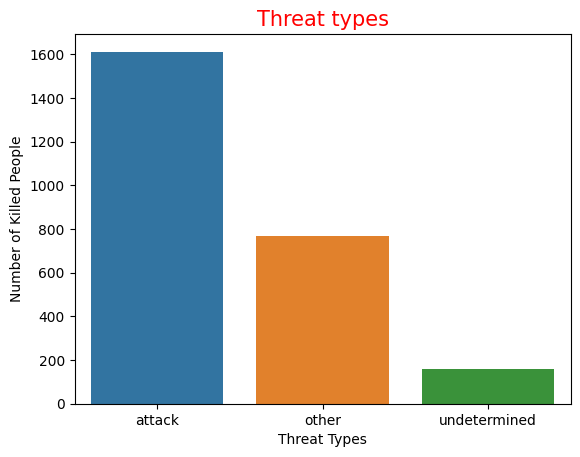

In [61]:
# Threat types

sns.countplot(x=kill["threat_level"])
plt.xlabel('Threat Types')
plt.ylabel('Number of Killed People')
plt.title('Threat types',color = 'red', fontsize = 15)

Text(0.5, 1.0, 'Flee types')

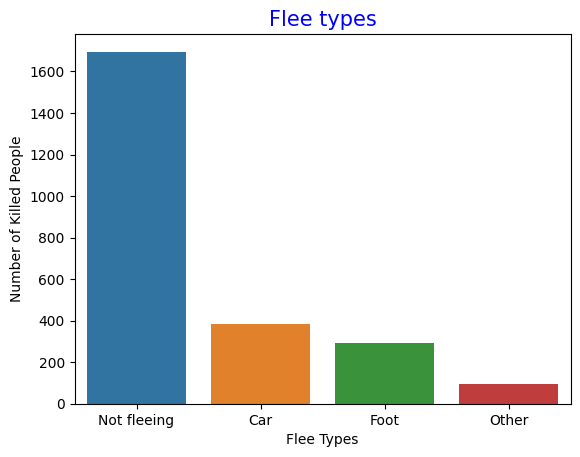

In [62]:
# Flee types

sns.countplot(x=kill["flee"])
plt.xlabel('Flee Types')
plt.ylabel('Number of Killed People')
plt.title('Flee types',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Having body cameras or not on Police')

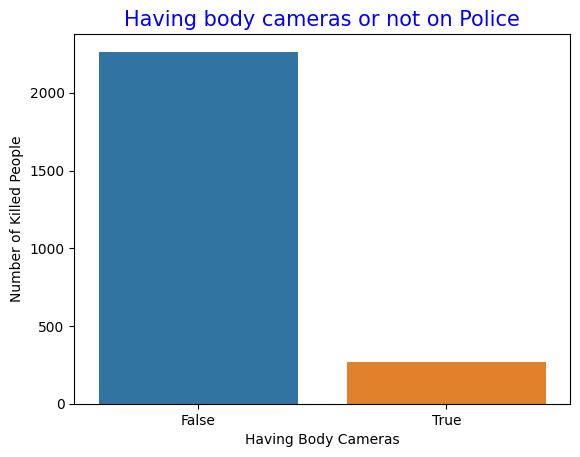

In [63]:
# Having body cameras or not for police

sns.countplot(x=kill["body_camera"])
plt.xlabel('Having Body Cameras')
plt.ylabel('Number of Killed People')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)

In [64]:
kill.body_camera.unique()

array([False,  True])

Text(0.5, 1.0, 'Kill Numbers from States')

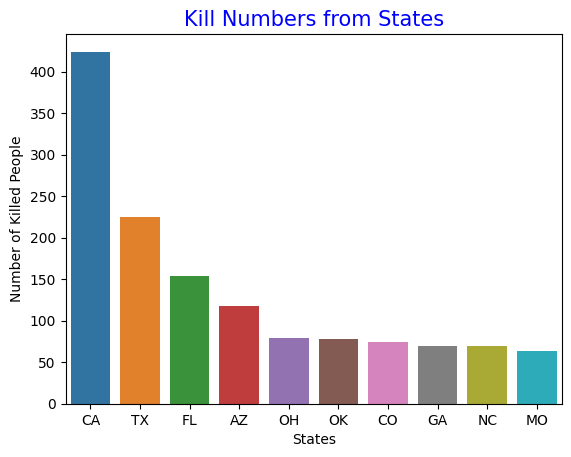

In [65]:
# Kill numbers from states in kill data

sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.ylabel('Number of Killed People')
plt.xlabel('States')
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)

# 🎯 Conclusion

In this study, we comprehensively learned the fundamental visualization techniques of the **Seaborn** library.

## 📊 What Did We Do?

### Data Processing
- Data cleaning and preprocessing
- Filling missing data
- Working with data types
- Working with multiple datasets

### Visualization Techniques
- **Bar Plot**: Comparison of categorical data
- **Point Plot**: Trend analysis with point graphs
- **Joint Plot**: Relationship between two variables
- **Pie Chart**: Percentage distributions
- **Lm Plot**: Regression analysis
- **Kde Plot**: Density distribution
- **Violin Plot**: Distribution and density visualization
- **Heatmap**: Correlation matrix analysis
- **Box Plot**: Outlier detection
- **Swarm Plot**: Categorical data distribution
- **Pair Plot**: Multivariate relationships
- **Count Plot**: Frequency analysis



Thank you for making it to the end.
